In [81]:
import numpy as np

import os
import json
import h5py

import matplotlib.pyplot as plt
import seaborn as sns
import cv2

import glob

from sklearn.model_selection import train_test_split

%matplotlib inline

In [6]:
def load_data(data_path, target_size=(128,128)):
    img_arr_img = []
    filelist_img = glob.glob(data_path+"*.png")
    image_paths = sorted(filelist_img)
    
    for image_path in image_paths:
        try:
            image = cv2.imread(image_path)
            image = cv2.resize(image, dsize=target_size)#interpolation=cv2.INTER_CUBIC) #/255.0
            #cv2.normalize(image, image, 0, 255, cv2.NORM_MINMAX)
            img_arr_img.append(image)
        except (RuntimeError, TypeError,NameError) as e:
            print(e)
            pass
    return np.asarray(img_arr_img), image_paths 

In [7]:
path_infected = '/kaggle/input/cell_images/cell_images/Parasitized/'
path_uninfected = '/kaggle/input/cell_images/cell_images/Uninfected/'

X_infected, filenames_infected = load_data(path_infected)
X_uninfected, filenames_uninfected = load_data(path_uninfected)

In [37]:
# We stack vertically X_infected and X_uninfected to make the data tensor X
X = np.vstack((X_uninfected, X_infected))

# Let's create the labels vector
# 0 stands for not infected
# 1 stands for infected
labels = [0]*X_uninfected.shape[0] + [1]*X_infected.shape[0]

# We need to separate the data into train and test arrays 
X_train, X_test, y_train, y_test = train_test_split(X,labels,test_size=0.1,random_state=42)


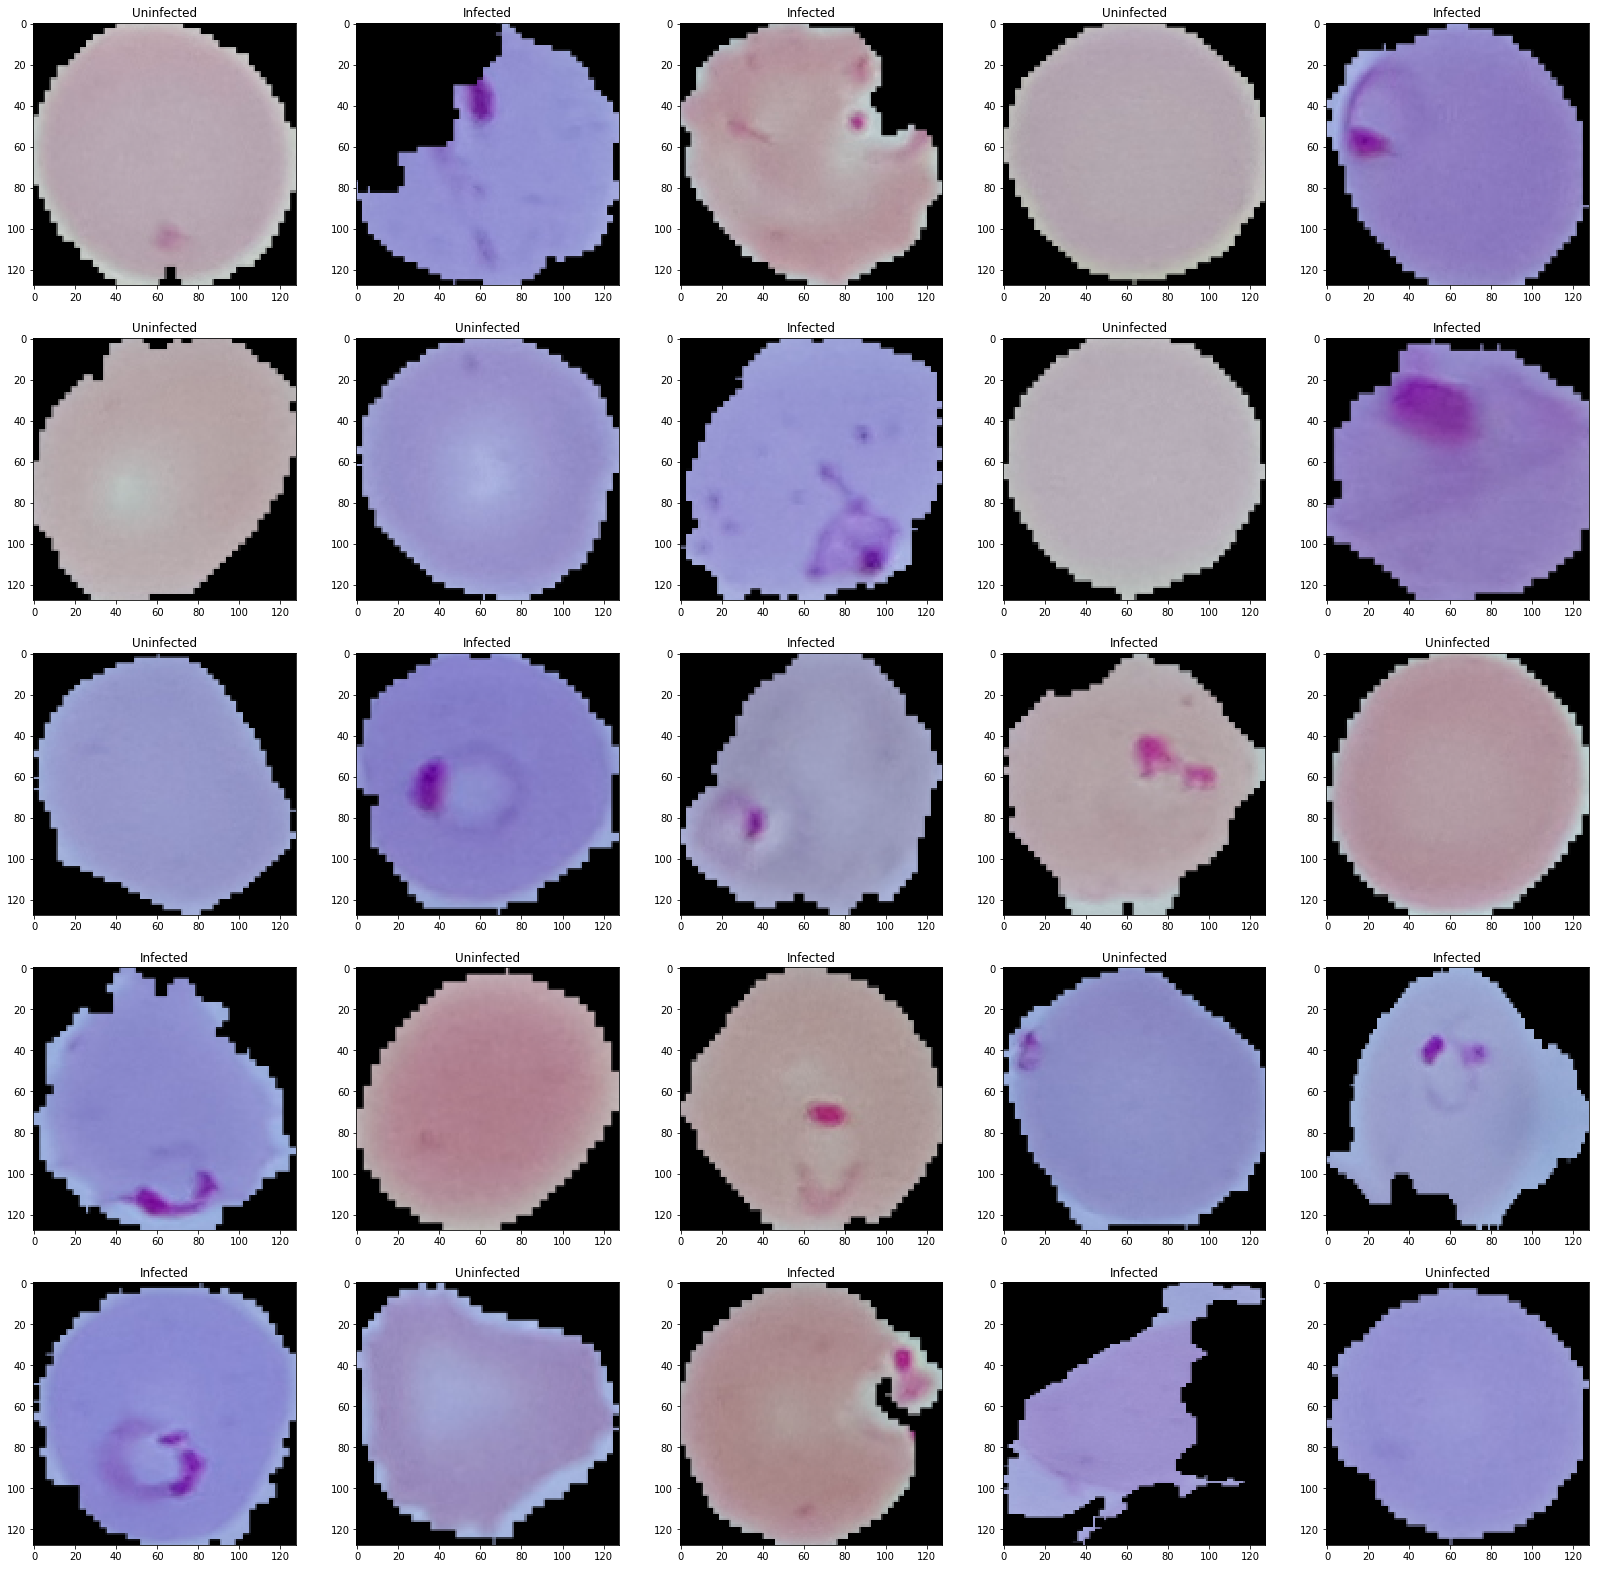

In [38]:
fig=plt.figure(figsize=(28, 28))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[i])
    if y_train[i] == 0:
        plt.title('Uninfected')
    else:
        plt.title('Infected')
    
plt.show()


In [55]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation

from sklearn.model_selection import train_test_split
from sklearn import preprocessing


K.set_image_data_format('channels_last')
np.random.seed(0)

def create_model(input_shape, with_summary):
    model = Sequential()
    model.add(Conv2D(10, kernel_size=5, padding="same", input_shape=input_shape, activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(20, kernel_size=3, padding="same", activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(30, kernel_size=3, padding="same", activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    #model.add(Conv2D(500, kernel_size=3, padding="same", activation = 'relu'))
    #model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    #model.add(Conv2D(1024, kernel_size=3, padding="valid", activation = 'relu'))
    #model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(units=30, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(units=10, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(units=5, activation='relu'))
    #model.add(Dropout(0.1))

    model.add(Dense(1))
    model.add(Activation("sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    if with_summary:
        model.summary()

    return model

def save_history(hist, filepath):
    with open(filepath, 'w') as f:
        json.dump(hist.history, f)

def plot_loss(history_filepath):
    with open(history_filepath) as json_data:
        history = json.load(json_data)
        #print(history)
    print(history.keys())
    plt.plot(history['loss'])
    plt.plot(history['acc'])
    plt.title('Training metrics')
    #plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss', 'accuracy'], loc='upper left')
    plt.show()

In [40]:
input_shape = (128, 128, 3)
model = create_model(input_shape=input_shape, with_summary=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 10)      760       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 20)        1820      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 20)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 30)        5430      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 30)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7680)              0         
__________

In [41]:
hist = model.fit(X_train, y_train,batch_size=512,epochs=20)

Epoch 1/20
24802/24802 [==============================] - 20s 815us/step - loss: 0.8640 - acc: 0.5396
Epoch 2/20
24802/24802 [==============================] - 15s 610us/step - loss: 0.6467 - acc: 0.6129
Epoch 3/20
24802/24802 [==============================] - 15s 612us/step - loss: 0.6091 - acc: 0.6585
Epoch 4/20
24802/24802 [==============================] - 15s 612us/step - loss: 0.5245 - acc: 0.7402
Epoch 5/20
24802/24802 [==============================] - 15s 612us/step - loss: 0.4019 - acc: 0.8271
Epoch 6/20
24802/24802 [==============================] - 15s 613us/step - loss: 0.3093 - acc: 0.8859
Epoch 7/20
24802/24802 [==============================] - 15s 613us/step - loss: 0.2539 - acc: 0.9135
Epoch 8/20
24802/24802 [==============================] - 15s 614us/step - loss: 0.2399 - acc: 0.9176
Epoch 9/20
24802/24802 [==============================] - 15s 615us/step - loss: 0.2084 - acc: 0.9321
Epoch 10/20
24802/24802 [==============================] - 15s 615us/step - loss: 

In [44]:
print(model.evaluate(X_test, y_test))
model.save_weights('/kaggle/working/cnn_model_20ep.h5') #model weights saved 

2756/2756 [==============================] - 1s 370us/step
[0.21350006218756318, 0.9412191582002902]


dict_keys(['loss', 'acc'])


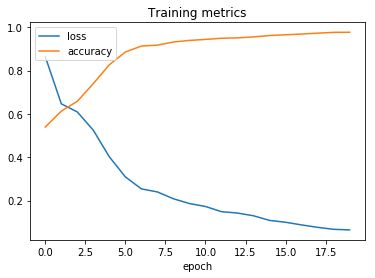

In [56]:
save_history(hist, filepath='/kaggle/working/training_history.json')
plot_loss(history_filepath='/kaggle/working/training_history.json')

# The Convolutionnal neural network managed to reach 97% accuracy on the images it trained on. After evaluating its performance on the test dataset, we get an accuracy of 94% for a binary crossentropyloss of 0.2 which is not bad after 20 epochs.

# Let's display 25 random test examples prediction results :

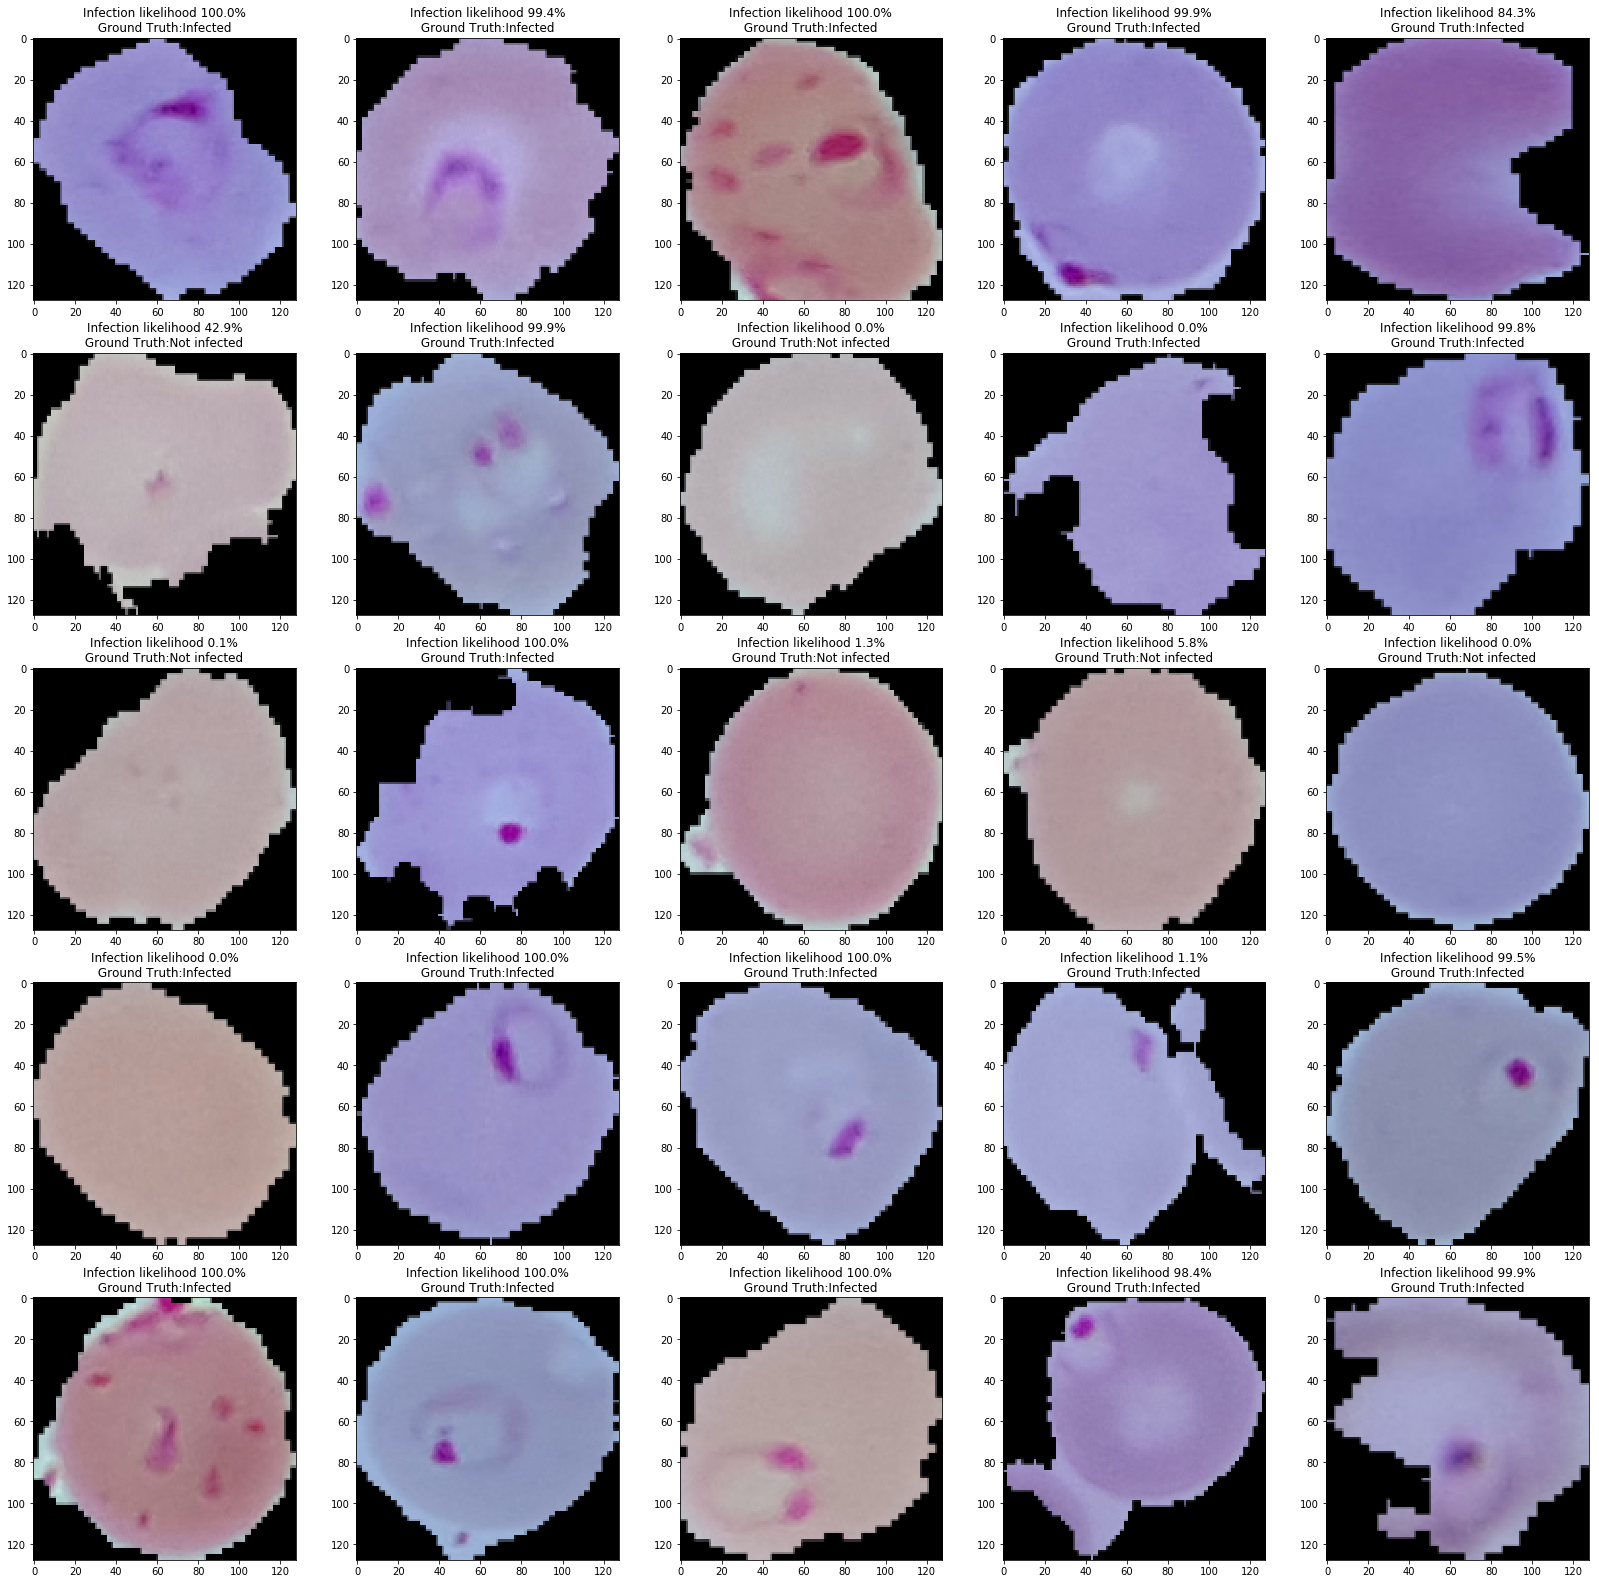

In [57]:
predictions = model.predict(X_test)

fig=plt.figure(figsize=(28, 28))
columns = 5
rows = 5
random_number = np.random.randint(0,X_test.shape[0]-26)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_test[i+random_number])
    gt = ['Not infected', 'Infected']
    plt.title('Infection likelihood {:.1%}\n Ground Truth:{} '.format(float(predictions[i+random_number]), gt[y_test[i+random_number]]))
    
plt.show()

# Let's use the classification_report function from sklearn and play with the threshold value until optimal scores for precision, recall and f1-score are reached.

In [79]:
from sklearn.metrics import classification_report, confusion_matrix

threshold = 0.65
predictions_final = [int(pred>threshold) for pred in predictions]

print(classification_report(y_test, predictions_final))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1407
           1       0.96      0.92      0.94      1349

   micro avg       0.94      0.94      0.94      2756
   macro avg       0.94      0.94      0.94      2756
weighted avg       0.94      0.94      0.94      2756



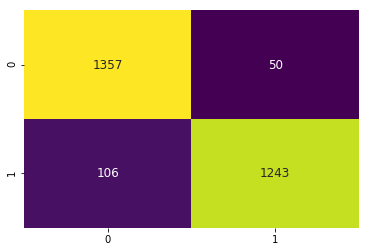

In [82]:
def draw_confusion_matrix(true,preds):
    conf_matx = confusion_matrix(true, preds)
    sns.heatmap(conf_matx, annot=True,annot_kws={"size": 12},fmt='g', cbar=False, cmap="viridis")
    plt.show()

draw_confusion_matrix(y_test, predictions_final)